In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import expon

In [2]:
df_30 = pd.read_csv('30mins_data.csv', header = 0, index_col = 'Date', names = ['Date', 'Real_Data', 'Synthetic_Data'])
df_day = pd.read_csv('Daily_data.csv', header = 0,index_col = 'Date', names = ['Date', 'Real_Data', 'Synthetic_Data'])

In [3]:
# # real data
price_return_real = (df_30['Real_Data'].shift(-1) - df_30['Real_Data']) / df_30['Real_Data']
price_return_real = price_return_real.dropna()
normalized_30_real = preprocessing.normalize([price_return_real])


In [4]:
# real data_day
price_return_real_day = (df_day['Real_Data'].shift(-1) - df_day['Real_Data']) / df_day['Real_Data']
price_return_real_day = price_return_real_day.dropna()
normalized_day_real = preprocessing.normalize([price_return_real_day])

In [5]:
# synthetic data
price_return_syn = (df_30['Synthetic_Data'].shift(-1) - df_30['Synthetic_Data']) / df_30['Synthetic_Data']
price_return_syn = price_return_syn.dropna()
normalized_30_syn = preprocessing.normalize([price_return_syn])


In [6]:
price_return_real

Date
2022/1/26 13:30    0.001441
2022/1/26 14:00   -0.007481
2022/1/26 14:30   -0.008666
2022/1/26 15:00    0.004614
2022/1/26 15:30    0.017887
                     ...   
2022/3/18 13:00   -0.001975
2022/3/18 13:30    0.001949
2022/3/18 14:00   -0.000546
2022/3/18 14:30    0.003561
2022/3/18 15:00   -0.000671
Name: Real_Data, Length: 472, dtype: float64

In [7]:
# synthetic day
price_return_syn_day = (df_day['Synthetic_Data'].shift(-1) - df_day['Synthetic_Data']) / df_day['Synthetic_Data']
price_return_syn_day = price_return_syn_day.dropna()
normalized_day_syn = preprocessing.normalize([price_return_syn_day])

In [8]:
df_30_norm = pd.DataFrame({'Real':normalized_30_real[0],'Synthetic': normalized_30_syn[0]})


In [9]:
df_day_norm = pd.DataFrame({'Real':normalized_day_real[0],'Synthetic': normalized_day_syn[0]})

In [10]:
count_30_real, bins_count_30_real = np.histogram(df_30_norm['Real'], bins = 50)
count_30_syn, bins_count_30_syn = np.histogram(df_30_norm['Synthetic'], bins = 50)

In [11]:
count_day_real, bins_count_day_real = np.histogram(df_day_norm['Real'], bins = 50)
count_day_syn, bins_count_day_syn = np.histogram(df_day_norm['Synthetic'], bins = 50)

In [12]:
bins_count_30_real

array([-0.26998441, -0.26059587, -0.25120733, -0.2418188 , -0.23243026,
       -0.22304172, -0.21365319, -0.20426465, -0.19487612, -0.18548758,
       -0.17609904, -0.16671051, -0.15732197, -0.14793343, -0.1385449 ,
       -0.12915636, -0.11976782, -0.11037929, -0.10099075, -0.09160221,
       -0.08221368, -0.07282514, -0.0634366 , -0.05404807, -0.04465953,
       -0.035271  , -0.02588246, -0.01649392, -0.00710539,  0.00228315,
        0.01167169,  0.02106022,  0.03044876,  0.0398373 ,  0.04922583,
        0.05861437,  0.06800291,  0.07739144,  0.08677998,  0.09616852,
        0.10555705,  0.11494559,  0.12433413,  0.13372266,  0.1431112 ,
        0.15249973,  0.16188827,  0.17127681,  0.18066534,  0.19005388,
        0.19944242])

In [13]:
# finding the PDF of the histogram using count values
pdf_30_real = count_30_real / sum(count_30_real)
pdf_30_syn = count_30_syn / sum (count_30_syn)

In [14]:
# finding the PDF of the histogram using count values
pdf_day_real = count_day_real / sum(count_day_real)
pdf_day_syn = count_day_syn / sum (count_day_syn)

In [15]:
x = np.linspace(0, 0.2, 100)

Text(0.5, 1.0, 'probability density function of 30 mintues real data & synthetic data')

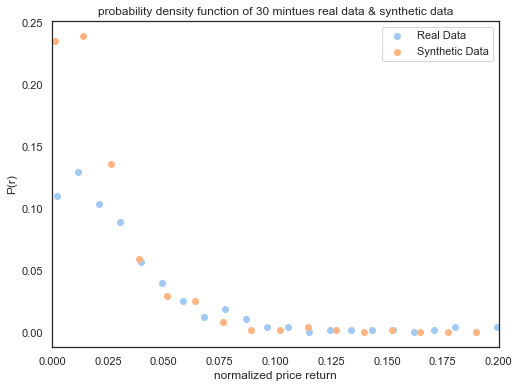

In [21]:
plt.figure(figsize = (8,6))
plt.scatter(bins_count_30_real[1:], pdf_30_real, label="Real Data")
plt.scatter(bins_count_30_syn[1:], pdf_30_syn, label="Synthetic Data")
plt.xlim(0,0.2)
plt.ylabel('P(r)')
plt.legend()
plt.xlabel('normalized price return')
plt.title('probability density function of 30 mintues real data & synthetic data')

Text(0.5, 1.0, 'probability density function of daily real data & synthetic data')

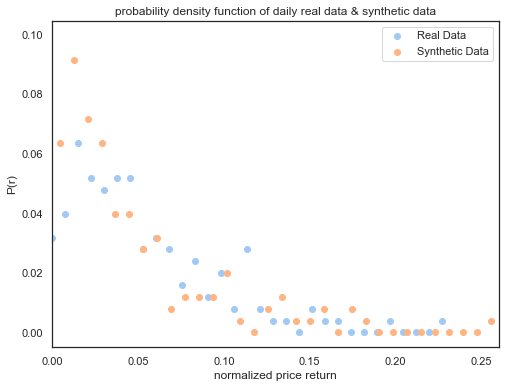

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(bins_count_day_real[1:], pdf_day_real, label="Real Data")
plt.scatter(bins_count_day_syn[1:], pdf_day_syn, label="Synthetic Data")
plt.xlim(0,0.26)
plt.ylabel('P(r)')
plt.legend()
plt.xlabel('normalized price return')
plt.title('probability density function of daily real data & synthetic data')

In [19]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [18]:
import seaborn as sns
sns.set_theme(style = 'white', palette = 'pastel')
plt.figure(figsize = (14,10))

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [ ]:
sns.displot(df)

In [ ]:
sns.displot(pdf_30_syn)